In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Logistic Regression


Not all problems are continuous


- There are instances where we want to determine a binary state


- Logistic regression is good for qualitative results


- Logistic regression is concerned with the probability that a response falls into a particular category


## Evaluating Classification

- True Positives
- True Negatives
- False Positives
- False Negatives


Logistic regression uses a Sigmoid function for situations where outputs can have one of two values either 0 or 1


$$\omega(z)=\frac{1}{1+e^{-z}}$$


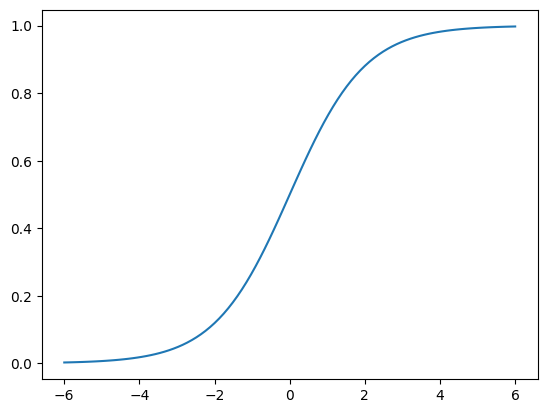

In [2]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

x = np.linspace(-6,6,100)
plt.plot(x,sigmoid(x))

**Take our linear regression solution and put it into a logistic model**

$$\omega(z)=\frac{1}{1+e^{-(x\beta + \epsilon)}}$$


## Example: Sinking of the Titanic

The Challenge:

The sinking of the Titanic is one of the most infamous shipwrecks in history.


On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.


While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.


In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


In [3]:
# Use pandas to read in csv file
train = pd.read_csv('./data/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Locates and Visualizes the Missing Values

- You cannot train a machine learning model with missing values. It will not know what to do.


In [5]:
# Use the .isnull() method to locate missing data
missing_values = train.isnull()
missing_values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

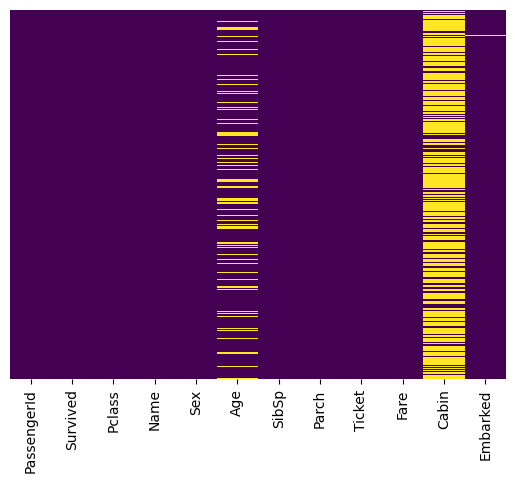

In [6]:
# Use seaborn to conduct heatmap to identify missing data
# data -> argument refers to the data to create heatmap
# yticklabels -> argument avoids plotting the column names
# cbar -> argument identifies if a colorbar is required or not
# cmap -> argument identifies the color of the heatmap
sns.heatmap(data = missing_values, yticklabels=False, cbar=False, cmap='viridis')

### Step 1: Viewing the ratios of the labels


<AxesSubplot:xlabel='Survived', ylabel='count'>

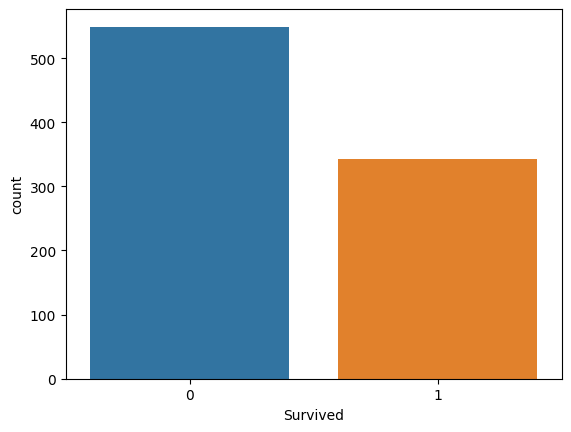

In [7]:
# Use the countplot() method to identify ratio of who survived vs. not
# (Tip) very helpful to get a visualization of the target label
# x -> argument refers to column of interest
# data -> argument refers to dataset
sns.countplot(x='Survived', data=train)

#### Survival Based on Category


<AxesSubplot:xlabel='Survived', ylabel='count'>

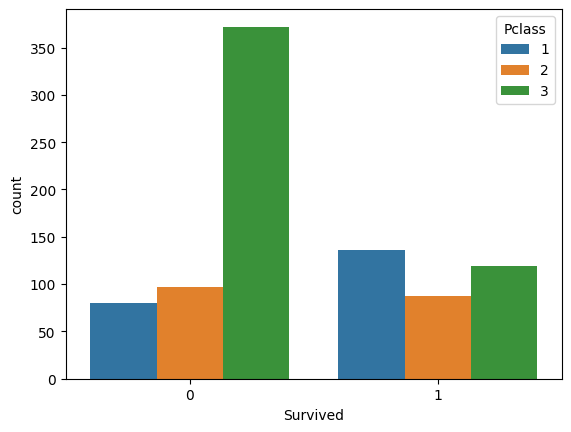

In [8]:
# Use the countplot() method to identify ratio of who survived vs. not with interest in Passenger class
# x -> argument refers to column of interest
# data -> argument refers to dataset
# hue -> allows another level to subdivide data
# palette -> argument refers to plot color
sns.countplot(x='Survived', data=train, hue='Pclass')

**What to do with all this missing data?**


We can impute or infill these values based on the data distribution

- When doing this it is important to look at the data distribution to make sure this makes sense


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

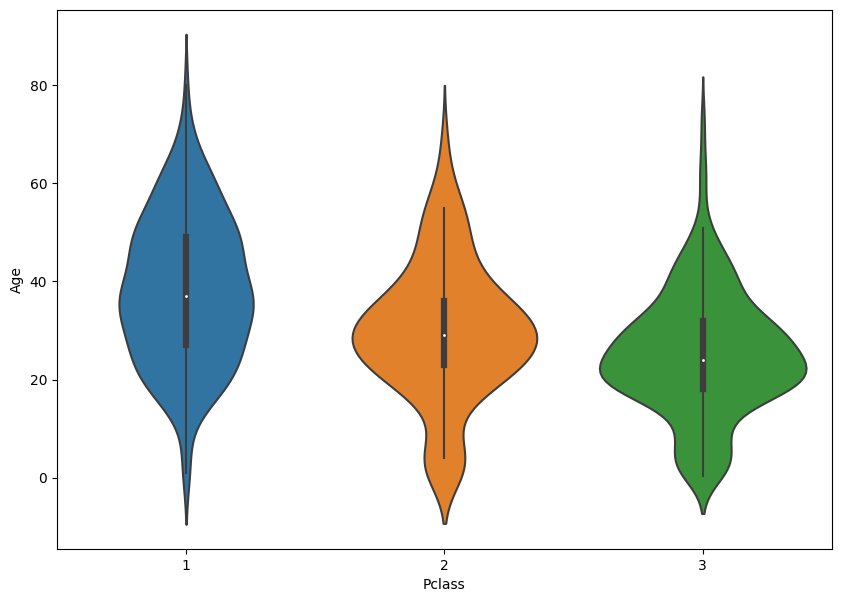

In [9]:
plt.figure(figsize=(10,7))
sns.violinplot(x='Pclass', y='Age', data = train)

### Step 2: Create a function to Impute Missing Values


In [10]:
# Create function to impute the age value if it is null
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
    
    
# Apply function to impute the age for missing values
# The age column is at position 0
# The pclass column is at position 1
# axis -> argument refers to columns instead of rows to apply the impute_age function
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [11]:
# Create function to replace the few empty Embark Values
def impute_embark(cols, value):
    embark = cols[0]
    
    if pd.isnull(embark):
        return value
    else: 
        return embark

    
train['Embarked'] = train[['Embarked']].apply(impute_embark, axis=1, args = (train['Embarked'].mode()[0]))

### Step 3: Visualize Imputed Results


**It is always important when you modify data you check that it worked**


<AxesSubplot:>

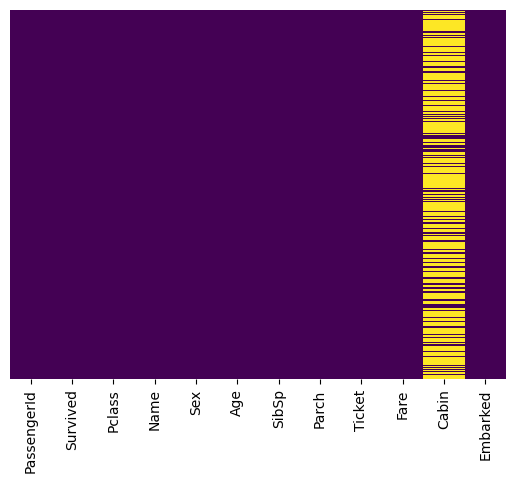

In [12]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**There are barely any cabin entries we should ignore them**


In [13]:
# use .dropna() method to remove rows that contain missing values
train.dropna(inplace=True)

### Step 4: Encoding Categorical Variables

**What should we do with categorical variables?**


We need to convert categorical variables (not understood by computers) into dummy variables that can be understood.


- Produces what is known as a one-hot encoded vector


![](./figs/one_hot_encoded.png)


In [14]:
# Use the .get_dummies() method to convert categorical data into dummy values
# train['Sex'] refers to the column we want to convert
# drop_first -> argument avoids the multicollinearity problem, which can undermines
# the statistical significance of an independent variable.
sex = pd.get_dummies(train['Sex'], drop_first=True) # drop first means k-1 values
embark = pd.get_dummies(train['Embarked'], drop_first=True)

# Use  .concat() method to merge the series data into one dataframe
train = pd.concat([train, sex, embark], axis=1)

### Step 5: Data Filtering

Remove any insignificant features from the dataset


In [15]:
# Drop columns with categorical data
train.drop(['Sex','Embarked','Ticket','Name','PassengerId'], axis=1, inplace=True)

### Step 6: Split the data into features and labels


In [16]:
# Split data into 'X' features and 'y' target label sets
X = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S']]
y = train['Survived']

### Step 7: Test/Train Split


In [17]:
# Split data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### Step 8: Create and Train the Model


In [18]:
# Create instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression()

# Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
logmodel.fit(X_train, y_train)

LogisticRegression()

In [19]:
from sklearn.metrics import classification_report

predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.54      0.58        26
           1       0.70      0.78      0.74        36

    accuracy                           0.68        62
   macro avg       0.67      0.66      0.66        62
weighted avg       0.67      0.68      0.67        62



### Step 9: Score the Model

#### F1-Score

It is calculated from the precision and recall of the test

- **Precision** is the number of true positive results divided by the number of all positive results, including those not identified correctly
  - known as positive predictive value

$$ Precision = \frac{True\,Positives}{True\,Positives + False\,Positives} $$

    - within everything that is predicted positive this is the percentage correct


- **Recall** is the number of true positive results divided by the number of all samples that should have been identified as positive.
  - known as sensitivity in diagnostic binary classification

$$ Recall = \frac{True\,Positives}{True\,Positives + False\,Negatives} $$

    - what is the fraction of actual positive results the model found


$$
F_1 = \frac{2}{\mathrm{recall}^{-1} + \mathrm{precision}^{-1}} = 2 \frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}} = \frac{2\mathrm{tp}}{2\mathrm{tp} + \mathrm{fp} + \mathrm{fn}}
$$


### Step 10: Visualizing Results


In [20]:
# computes the confusion matrix
cm = confusion_matrix(y_test, predictions)

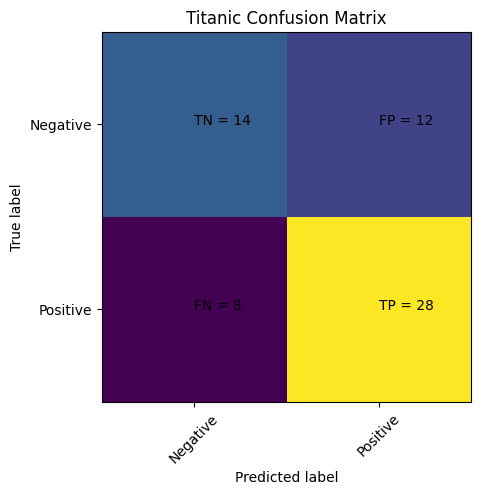

In [21]:
# Plots the confusion matrix

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)
classNames = ['Negative','Positive']
plt.title('Titanic Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

## Multiclass classification

If you have several classes to predict, an option often used is to fit one-versus-all classifiers and then use a voting heuristic for the final decision.


In [22]:
from sklearn.datasets import load_iris

# loads the dataset
X, y = load_iris(return_X_y=True)

# Instantiates the model and computes the logistic regression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X, y)

# This predicts the classes
clf.predict(X[:2, :])

C:\Users\jca92\.conda\envs\jupyterbook\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0])

In [23]:
# predicting the probability
clf.predict_proba(X[:2, :]) 

array([[9.81796298e-01, 1.82036873e-02, 1.44267582e-08],
       [9.71723984e-01, 2.82759862e-02, 3.01653914e-08]])

In [24]:
# Shows the score for the model
clf.score(X, y)

0.9733333333333334